### Class 7

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
#from autograd import grad, hessian
from matplotlib.lines import Line2D 

#### 1. Maximize $f(x,y) = xy+x$ subject to $4x+2y=60$

In [11]:
# Define the objective function
def objective(var):
    x, y = var
    return -(x * y + x)  # Negative for maximization

# Define the constraint 4x + 2y = 60
def constraint(var):
    x, y = var
    return 4 * x + 2 * y - 60

# Set up the constraints dictionary
constraints = {
    'type': 'eq',
    'fun': constraint
}

# Initial guess
x0 = np.array([1.0, 1.0])

# Perform the optimization using SLSQP
result = minimize(
    objective,
    x0,
    method='SLSQP',
    constraints=constraints,
    options={'disp': True}
)

# Print the optimal solution and the optimal value
print("Optimal solution:", result.x)
print("Objective function value:", -result.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -120.12499999999999
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimal solution: [ 7.75000002 14.49999995]
Objective function value: 120.12499999999999


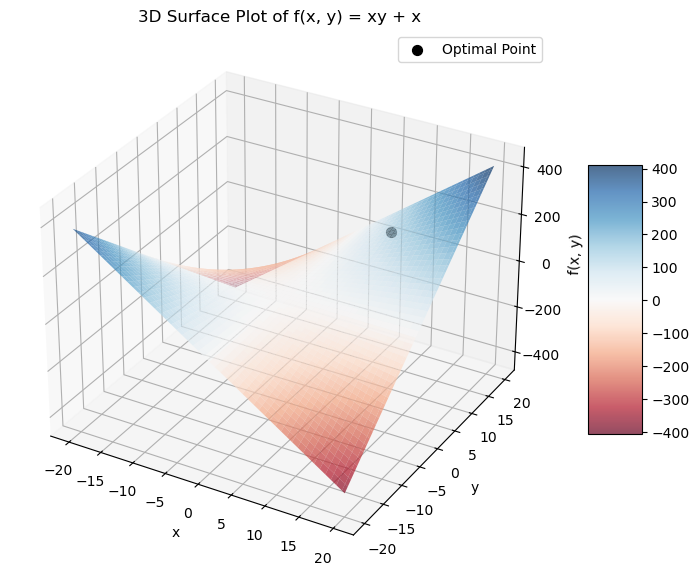

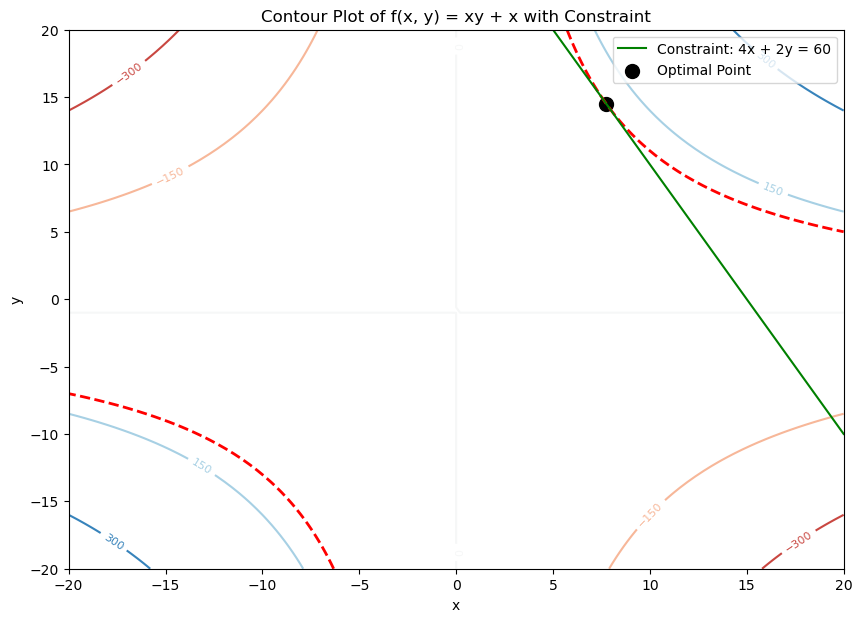

In [13]:
# Define the function for graphing
def funcGraph(x, y):
    return x * y + x

# Define the range and number of points for the grid
xMin= -20
xMax = 20    # Grid range for x
yMin, yMax = -20, 20    # Grid range for y
nPoints = 100           # Number of points in the grid

# Create a grid of points
x = np.linspace(xMin, xMax, nPoints)      # Range of x
y = np.linspace(yMin, yMax, nPoints)      # Range of y
X, Y = np.meshgrid(x, y)                   # Grid coordinates
Z = funcGraph(X, Y)                        # Function values at grid points

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.RdBu, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the optimal point
ax.scatter(result.x[0], result.x[1], -result.fun, color='k', marker='o', s=50, label='Optimal Point')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('3D Surface Plot of f(x, y) = xy + x')
ax.legend()

# Show the 3D plot
plt.show()

# Contour Plot (Level Curves)
plt.figure(figsize=(10, 7))

# Plot the level curves of the function
contour = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(contour, inline=True, fontsize=8)

# Plot the level curve corresponding to the optimal function value
f_opt = -result.fun
optimal_contour = plt.contour(X, Y, Z, levels=[f_opt], colors='r', linewidths=2, linestyles='--')

# Plot the level curve corresponding to the optimal function value
#optimal_contour = plt.contour(X, Y, Z, levels=[-result.fun], colors='k', linewidths=2, linestyles='--')

# Plot the constraint line 4x + 2y = 60 => y = (60 - 4x)/2
plt.plot(x, (60 - 4 * x) / 2, label='Constraint: 4x + 2y = 60', color='green')

# Plot the optimal point
plt.scatter(result.x[0], result.x[1], color='k', marker='o', s=100, label='Optimal Point')

# Update the legend to include all necessary labels
plt.legend()

# Set limits, labels, and title
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = xy + x with Constraint')

# Show the contour plot
plt.show()

#### 2. Minimize $f(x,y)=x^2 + y$ subject to $x * y = 12$

In [14]:
# Define the objective function
def objective(var):
    x, y = var
    return x**2 + y  # Function to minimize

# Define the constraint x * y = 12
def constraint(var):
    x, y = var
    return x * y - 12

# Set up the constraints dictionary
constraints = {
    'type': 'eq',
    'fun': constraint
}

# Initial guess
x0 = np.array([1.0, 12.0])

# Perform the optimization using SLSQP
result = minimize(
    objective,
    x0,
    method='SLSQP',
    constraints=constraints,
    options={'disp': True}
)

# Print the optimal solution and objective value
print("Optimal solution:", result.x)
print("Objective function value:", result.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 9.90578174638198
            Iterations: 8
            Function evaluations: 24
            Gradient evaluations: 8
Optimal solution: [1.81712063 6.60385436]
Objective function value: 9.90578174638198


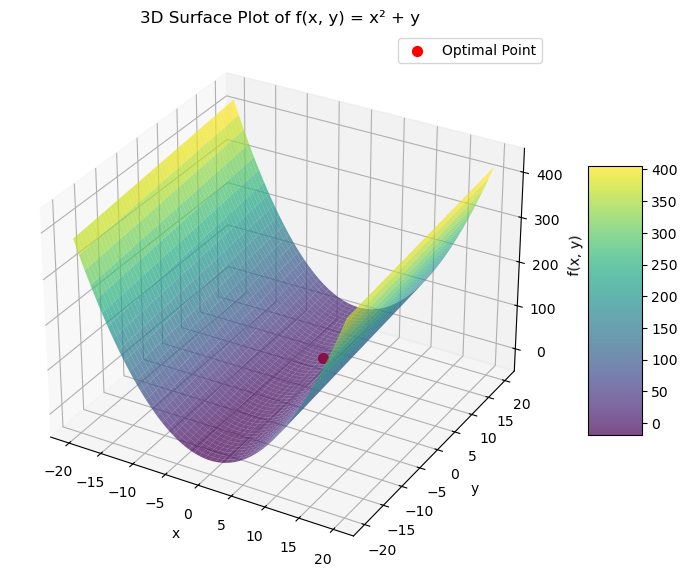

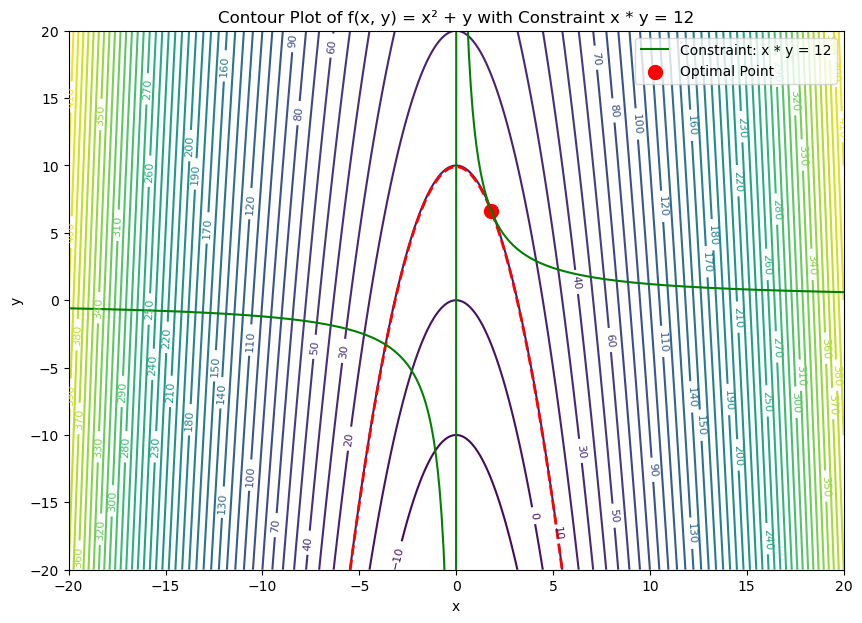

In [15]:
# Define the function for graphing
def funcGraph(x, y):
    return x**2 + y

# Define the range and number of points for the grid
xMin, xMax = -20, 20    # Grid range for x
yMin, yMax = -20, 20    # Grid range for y
nPoints = 400           # Number of points in the grid

# Create a grid of points
x = np.linspace(xMin, xMax, nPoints)      # Range of x
y = np.linspace(yMin, yMax, nPoints)      # Range of y
X, Y = np.meshgrid(x, y)                   # Grid coordinates
Z = funcGraph(X, Y)                        # Function values at grid points

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the optimal point
x_opt, y_opt = result.x
f_opt = result.fun
ax.scatter(x_opt, y_opt, f_opt, color='r', marker='o', s=50, label='Optimal Point')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('3D Surface Plot of f(x, y) = x² + y')
ax.legend()

# Show the 3D plot
plt.show()

# Contour Plot (Level Curves)
plt.figure(figsize=(10, 7))
contour_levels = 50  # Number of contour levels

# Plot the level curves of the function
contour = plt.contour(X, Y, Z, levels=contour_levels, cmap=cm.viridis)
plt.clabel(contour, inline=True, fontsize=8)

# Plot the level curve corresponding to the optimal function value
optimal_contour = plt.contour(X, Y, Z, levels=[f_opt], colors='r', linewidths=2, linestyles='--')

# Plot the constraint line x * y = 12
# Solve for y in terms of x: y = 12 / x
x_constraint = np.linspace(xMin, xMax, 400)
# Avoid division by zero
x_constraint = x_constraint[x_constraint != 0]
y_constraint = 12 / x_constraint
plt.plot(x_constraint, y_constraint, label='Constraint: x * y = 12', color='green')

# Plot the optimal point
plt.scatter(x_opt, y_opt, color='r', marker='o', s=100, label='Optimal Point')

# Update the legend to include all necessary labels
plt.legend()

# Set limits, labels, and title
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = x² + y with Constraint x * y = 12')

# Show the contour plot
plt.show()

#### 3. Minimize $f(x,y)=x^2 + y^2 + xy$ subject to $x + y = 4$

In [19]:
# Define the objective function
def objective(var):
    x, y = var
    return x**2 + y**2 + x * y  # Function to minimize

# Define the constraint x + y = 4
def constraint(var):
    x, y = var
    return x + y - 4

# Set up the constraints dictionary
constraints = {
    'type': 'eq',
    'fun': constraint
}

# Initial guess
x0 = np.array([1.0, 3.0])

# Perform the optimization using SLSQP
result = minimize(
    objective,
    x0,
    method='SLSQP',
    constraints=constraints,
    options={'disp': True}
)

# Print the optimal solution and objective value
print("Optimal solution:", result.x)
print("Objective function value:", result.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.0
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2
Optimal solution: [2. 2.]
Objective function value: 12.0


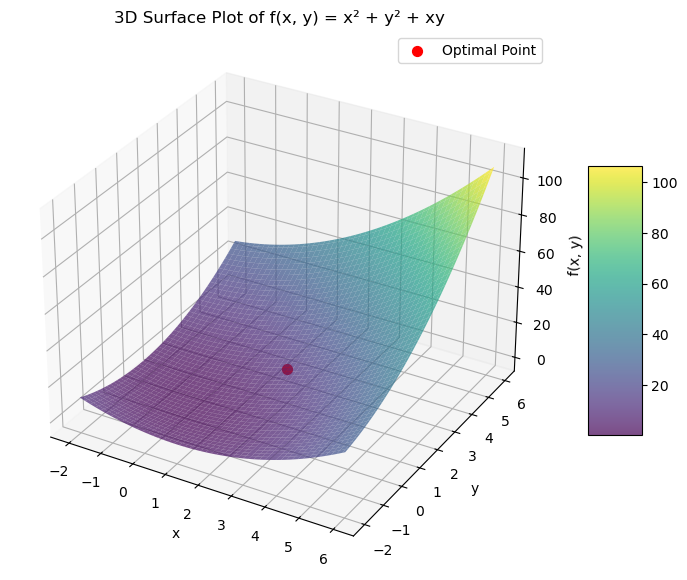

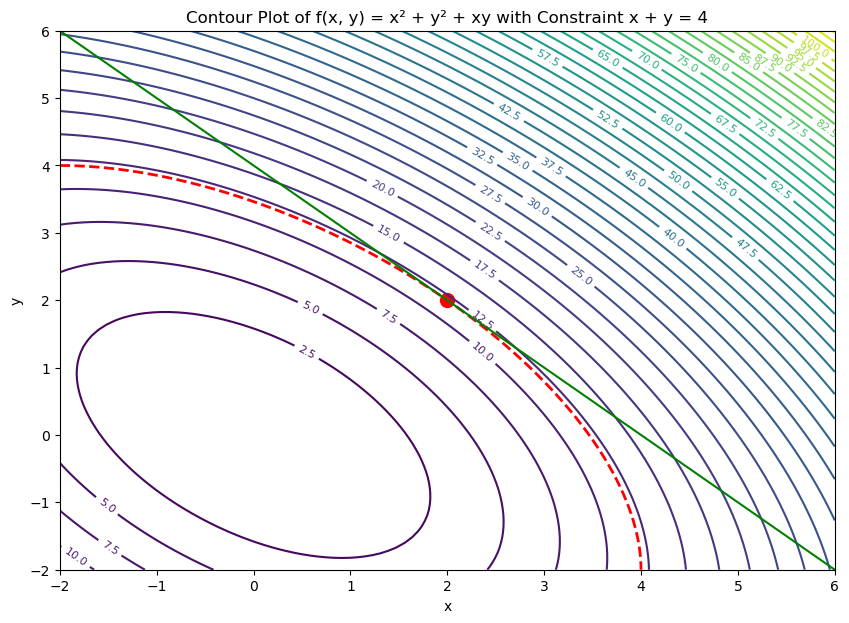

In [20]:
# Define the function for graphing
def funcGraph(x, y):
    return x**2 + y**2 + x * y

# Define the range and number of points for the grid
xMin, xMax = -2, 6    # Grid range for x
yMin, yMax = -2, 6    # Grid range for y
nPoints = 100          # Number of points in the grid

# Create a grid of points
x = np.linspace(xMin, xMax, nPoints)      # Range of x
y = np.linspace(yMin, yMax, nPoints)      # Range of y
X, Y = np.meshgrid(x, y)                   # Grid coordinates
Z = funcGraph(X, Y)                        # Function values at grid points

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the optimal point
x_opt, y_opt = result.x
f_opt = result.fun
ax.scatter(x_opt, y_opt, f_opt, color='r', marker='o', s=50, label='Optimal Point')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('3D Surface Plot of f(x, y) = x² + y² + xy')
ax.legend()

# Show the 3D plot
plt.show()

# Contour Plot (Level Curves)
plt.figure(figsize=(10, 7))
contour_levels = 50  # Number of contour levels

# Plot the level curves of the function
contour = plt.contour(X, Y, Z, levels=contour_levels, cmap=cm.viridis)
plt.clabel(contour, inline=True, fontsize=8)

# Plot the level curve corresponding to the optimal function value
optimal_contour = plt.contour(X, Y, Z, levels=[f_opt], colors='r', linewidths=2, linestyles='--')


# Plot the constraint line x + y = 4 => y = 4 - x
x_constraint = np.linspace(xMin, xMax, 400)
y_constraint = 4 - x_constraint
plt.plot(x_constraint, y_constraint, label='Constraint: x + y = 4', color='green')

# Plot the optimal point
plt.scatter(x_opt, y_opt, color='r', marker='o', s=100, label='Optimal Point')

# Update the legend to include all necessary labels
#plt.legend(handles=[optimal_line])

# Set limits, labels, and title
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = x² + y² + xy with Constraint x + y = 4')

# Show the contour plot
plt.show()

<Figure size 640x480 with 0 Axes>

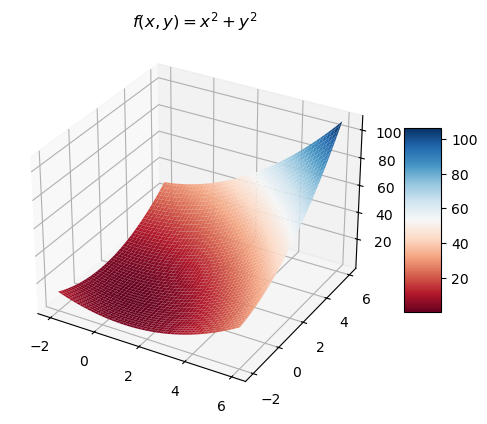

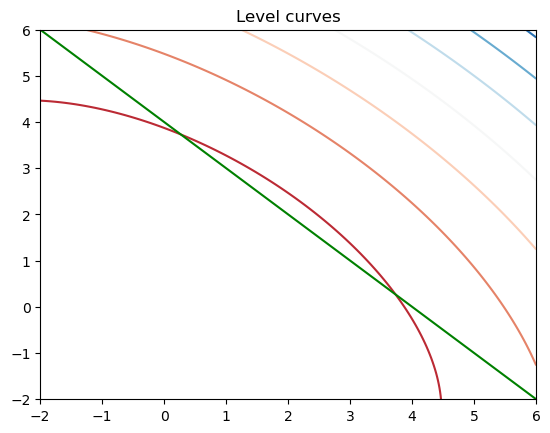

In [22]:
# Graph
fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

surf = ax.plot_surface(X, Y, Z,cmap=cm.RdBu)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('$f(x,y)=x^2+y^2$')
plt.show()

# Level curves

plt.contour(x,y,Z,cmap=cm.RdBu)

# Plot the constraint line x + y = 4 => y = 4 - x
x_constraint = np.linspace(xMin, xMax, 400)
y_constraint = 4 - x_constraint
plt.plot(x_constraint, y_constraint, label='Constraint: x + y = 4', color='green')
plt.title('Level curves')
plt.show()

#### 4. Maximize $f(x,y) = x * y$ soggetto a $x + 2y \leq 16$

In [63]:
# Define the objective function (negative for maximization)
def objective(var):
    x, y = var
    return -(x * y)  # Negative to convert maximization to minimization

# Define the inequality constraint x + 2y <= 16 as 16 - x - 2y >= 0
def constraint(var):
    x, y = var
    return 16 - x - 2 * y

# Set up the constraints dictionary
constraints = {
    'type': 'ineq',
    'fun': constraint
}

# Initial guess
x0 = np.array([2.0, 7.0])

# Perform the optimization using SLSQP
result = minimize(
    objective,
    x0,
    method='SLSQP',
    constraints=constraints,
    options={'disp': True}
)

# Print the optimal solution and objective value
print("Optimal solution:", result.x)
print("Objective function value:", -(result.fun))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -32.00000000000015
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimal solution: [8.00000021 3.9999999 ]
Objective function value: 32.00000000000015


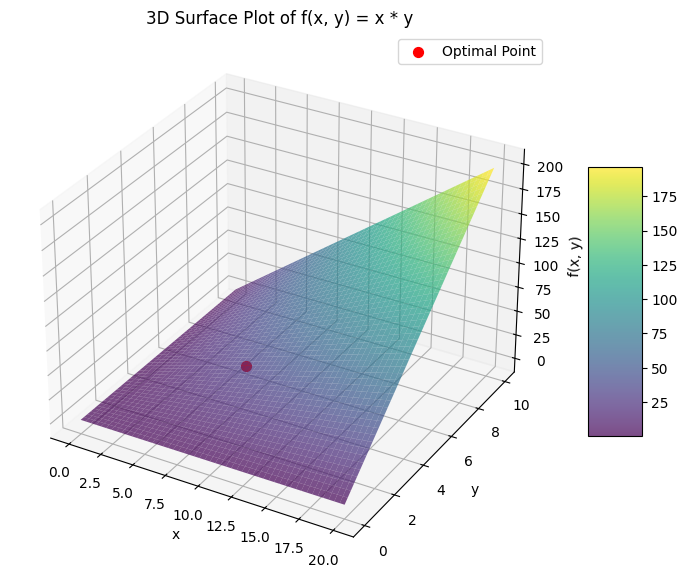

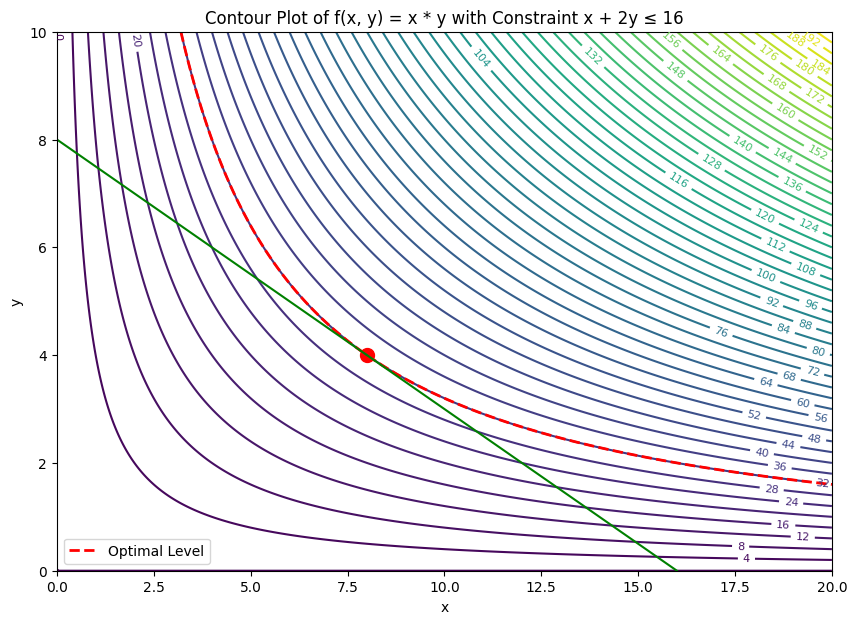

In [64]:
# Define the function for graphing
def funcGraph(x, y):
    return x * y

# Define the range and number of points for the grid
xMin, xMax = 0, 20    # Grid range for x
yMin, yMax = 0, 10    # Grid range for y
nPoints = 400          # Number of points in the grid

# Create a grid of points
x = np.linspace(xMin, xMax, nPoints)      # Range of x
y = np.linspace(yMin, yMax, nPoints)      # Range of y
X, Y = np.meshgrid(x, y)                   # Grid coordinates
Z = funcGraph(X, Y)                        # Function values at grid points

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the optimal point
x_opt, y_opt = result.x
f_opt = -(result.fun)
ax.scatter(x_opt, y_opt, f_opt, color='r', marker='o', s=50, label='Optimal Point')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('3D Surface Plot of f(x, y) = x * y')
ax.legend()

# Show the 3D plot
plt.show()

# Contour Plot (Level Curves)
plt.figure(figsize=(10, 7))
contour_levels = 50  # Number of contour levels

# Plot the level curves of the function
contour = plt.contour(X, Y, Z, levels=contour_levels, cmap=cm.viridis)
plt.clabel(contour, inline=True, fontsize=8)

# Plot the level curve corresponding to the optimal function value
optimal_contour = plt.contour(X, Y, Z, levels=[f_opt], colors='r', linewidths=2, linestyles='--')

# Create a proxy artist for the optimal contour to include it in the legend
optimal_line = Line2D([0], [0], color='r', linewidth=2, linestyle='--', label='Optimal Level')

# Plot the constraint line x + 2y = 16 => y = (16 - x)/2
x_constraint = np.linspace(xMin, 16, 400)
y_constraint = (16 - x_constraint) / 2
plt.plot(x_constraint, y_constraint, label='Constraint: x + 2y ≤ 16', color='green')

# Plot the optimal point
plt.scatter(x_opt, y_opt, color='r', marker='o', s=100, label='Optimal Point')

# Update the legend to include all necessary labels
plt.legend(handles=[optimal_line])

# Set limits, labels, and title
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = x * y with Constraint x + 2y ≤ 16')

# Show the contour plot
plt.show()

#### 5. Minimize $f(x,y) = (x - 2)^2 + (y + 3)^2$ soggetto a $x + y \geq 5$

In [65]:
# Define the objective function (to minimize)
def objective(var):
    x, y = var
    return (x - 2)**2 + (y + 3)**2  

# Define the inequality constraint x + y >= 5 as x + y - 5 >= 0
def constraint(var):
    x, y = var
    return x + y - 5

# Set up the constraints dictionary
constraints = {
    'type': 'ineq',
    'fun': constraint
}

# Initial guess
x0 = np.array([1.0, 4.0])

# Perform the optimization using SLSQP
result = minimize(
    objective,
    x0,
    method='SLSQP',
    constraints=constraints,
    options={'disp': True}
)

# Print the optimal solution and objective value
print("Optimal solution:", result.x)
print("Objective function value:", result.fun)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 17.99999999999985
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Optimal solution: [ 5.00000000e+00 -1.24344979e-14]
Objective function value: 17.99999999999985


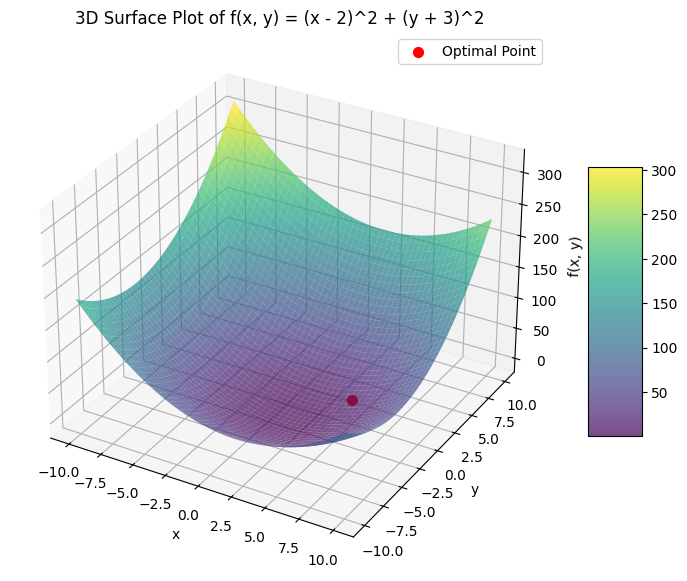

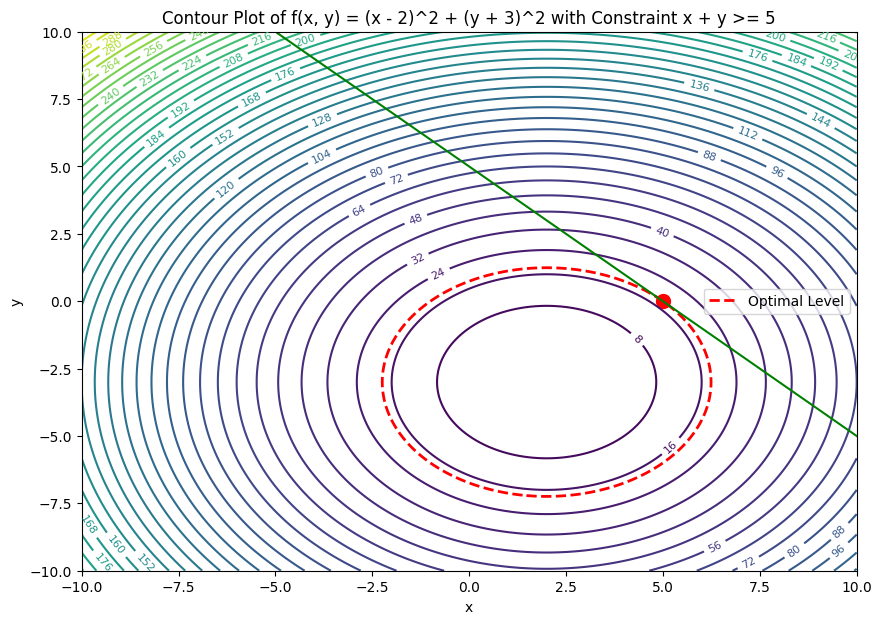

In [67]:
# Define the function for graphing
def funcGraph(x, y):
    return (x - 2)**2 + (y + 3)**2

# Define the range and number of points for the grid
xMin, xMax = -10, 10    # Grid range for x
yMin, yMax = -10, 10    # Grid range for y
nPoints = 400          # Number of points in the grid

# Create a grid of points
x = np.linspace(xMin, xMax, nPoints)      # Range of x
y = np.linspace(yMin, yMax, nPoints)      # Range of y
X, Y = np.meshgrid(x, y)                   # Grid coordinates
Z = funcGraph(X, Y)                        # Function values at grid points

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.7)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the optimal point
x_opt, y_opt = result.x
f_opt = result.fun
ax.scatter(x_opt, y_opt, f_opt, color='r', marker='o', s=50, label='Optimal Point')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.title('3D Surface Plot of f(x, y) = (x - 2)^2 + (y + 3)^2')
ax.legend()

# Show the 3D plot
plt.show()

# Contour Plot (Level Curves)
plt.figure(figsize=(10, 7))
contour_levels = 50  # Number of contour levels

# Plot the level curves of the function
contour = plt.contour(X, Y, Z, levels=contour_levels, cmap=cm.viridis)
plt.clabel(contour, inline=True, fontsize=8)

# Plot the level curve corresponding to the optimal function value
optimal_contour = plt.contour(X, Y, Z, levels=[f_opt], colors='r', linewidths=2, linestyles='--')

# Create a proxy artist for the optimal contour to include it in the legend
optimal_line = Line2D([0], [0], color='r', linewidth=2, linestyle='--', label='Optimal Level')

# Plot the constraint line x + y = 5 => y = 5 - x
x_constraint = np.linspace(xMin, xMax, 400)
y_constraint = 5 - x_constraint
plt.plot(x_constraint, y_constraint, label='Constraint: x + y >= 5', color='green')

# Plot the optimal point
plt.scatter(x_opt, y_opt, color='r', marker='o', s=100, label='Optimal Point')

# Update the legend to include all necessary labels
plt.legend(handles=[optimal_line])

# Set limits, labels, and title
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = (x - 2)^2 + (y + 3)^2 with Constraint x + y >= 5')

# Show the contour plot
plt.show()